In [1]:
#pip install opencv-python

In [2]:
import cv2
import numpy as np
from google.colab import files
uploaded = files.upload()


Saving Q1_image.jpg to Q1_image.jpg


In [3]:
# Load the image
img = cv2.imread('Q1_image.jpg')

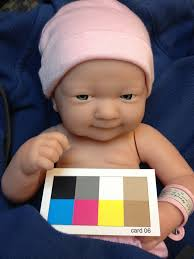

In [4]:
from google.colab.patches import cv2_imshow
# Display the image in a window
cv2_imshow(img)

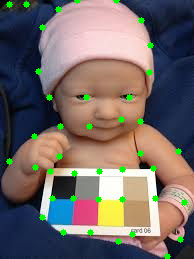

In [9]:


# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Define the calibration board size
board_size = (7, 9)

# Find the corners using the cv2.goodFeaturesToTrack function
corners = cv2.goodFeaturesToTrack(gray, np.prod(board_size), 0.01, 20)

if corners is not None:
    # Refine the corner positions
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    corners = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)

    # Draw the corners on the image
    for corner in corners:
        x, y = corner[0]
        cv2.circle(img, (int(x), int(y)), 3, (0, 255, 0), -1)

    # Square segmentation and color classification
    for i, corner in enumerate(corners):
        x, y = corner[0]

        # Define the size of the square
        square_size = 40

        # Extract the square from the image
        sub_image = img[int(y-square_size/2):int(y+square_size/2), int(x-square_size/2):int(x+square_size/2)]

        # Convert the sub-image to a 2D array of pixels
        pixels = sub_image.reshape((-1, 3)).astype(np.float32)

        # Classify the color of the sub-image
        color = np.mean(pixels, axis=0).astype(np.uint8)

   
       

    # Display the result
    cv2_imshow(img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print('Corners not found.')

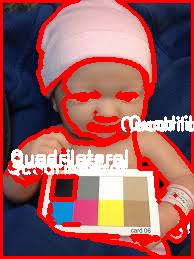

In [10]:
# Load the image
img = cv2.imread('Q1_image.jpg')
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# setting threshold of gray image
_, threshold = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# using a findContours() function
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
i = 0
# list for storing names of shapes
for contour in contours:
  
    # here we are ignoring first counter because 
    # findcontour function detects whole image as shape
    if i == 0:
        i = 1
        continue
  
    # cv2.approxPloyDP() function to approximate the shape
    approx = cv2.approxPolyDP(
        contour, 0.01 * cv2.arcLength(contour, True), True)
      
    # using drawContours() function
    cv2.drawContours(img, [contour], 0, (0, 0, 255), 3)
  
    # finding center point of shape
    M = cv2.moments(contour)
    if M['m00'] != 0.0:
        x = int(M['m10']/M['m00'])
        y = int(M['m01']/M['m00'])
    if len(approx) == 4:
        cv2.putText(img, 'Quadrilateral', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
# displaying the image after drawing contours
cv2_imshow(img)
  

Number of contours detected: 79


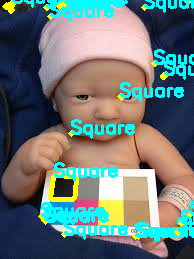

In [11]:
img = cv2.imread('Q1_image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(gray,50,255,0)
contours,hierarchy = cv2.findContours(thresh, 2, 2)
print("Number of contours detected:", len(contours))

for cnt in contours:
   x1,y1 = cnt[0][0]
   approx = cv2.approxPolyDP(cnt, 0.06*cv2.arcLength(cnt, True), True)
   if len(approx) == 4:
      x, y, w, h = cv2.boundingRect(cnt)
      ratio = float(w)/h
      if ratio >= 0.95 and ratio <= 1.8:
         img = cv2.drawContours(img, [cnt], -1, (0,255,255), 3)
         cv2.putText(img, 'Square', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 2)
      # else:
      #    cv2.putText(img, 'Rectangle', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
      #    img = cv2.drawContours(img, [cnt], -1, (0,255,0), 3)

# displaying the image after drawing contours
cv2_imshow(img)

Number of contours detected: 44


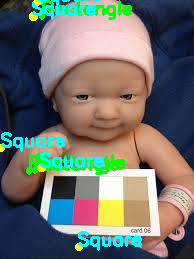

In [12]:
# Load the image
img = cv2.imread('Q1_image.jpg')
width = 300
height = 400
dim = (width, height)
 
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
# Convert to grayscale
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
# Apply a Gaussian blur to the grayscale image
blur = cv2.GaussianBlur(gray, (5,5), 0)
# Apply adaptive thresholding
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, blockSize=25, C=11)
# Perform morphological operations
kernel = np.ones((4,2),np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
# Find contours
contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Number of contours detected:", len(contours))
for cnt in contours:
   x1,y1 = cnt[0][0]
   approx = cv2.approxPolyDP(cnt, 0.02*cv2.arcLength(cnt, True), True)
   if len(approx) == 4:
      x, y, w, h = cv2.boundingRect(cnt)
      ratio = float(w)/h
      if ratio >= 0.7 and ratio <= 2:
         img = cv2.drawContours(img, [cnt], -1, (0,255,255), 3)
         cv2.putText(img, 'Square', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 2)
      else:
         cv2.putText(img, 'Rectangle', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
         img = cv2.drawContours(img, [cnt], -1, (0,255,0), 3)
# displaying the image after drawing contours
cv2_imshow(img)       

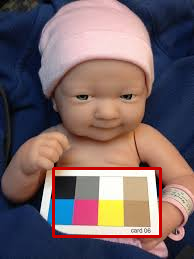

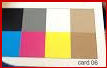

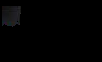

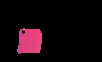

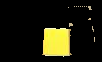

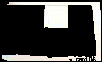

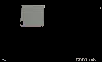

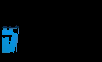

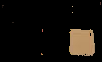

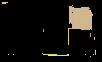

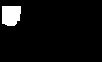

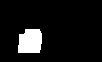

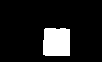

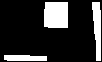

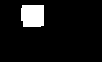

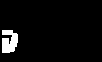

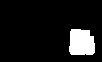

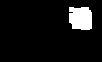

In [13]:
# Load the image
img = cv2.imread('Q1_image.jpg')
import cv2
from google.colab.patches import cv2_imshow

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the grayscale image to extract white pixels
_, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

# Apply a bitwise AND operation to the original image and the thresholded image
white_img = cv2.bitwise_and(img, img, mask=thresh)

# Find the contours of the white image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get the bounding box of the largest contour (which should be the white image)
x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))
cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 200), 2)
# Display the resulting image
cv2_imshow(img)


# Crop the white image from the original image
white_crop = img[y:y+h, x:x+w]

# Display the cropped white image
cv2_imshow (white_crop)
cv2.waitKey(0)
cv2.destroyAllWindows()
# Convert the image to grayscale
gray = cv2.cvtColor(white_crop, cv2.COLOR_BGR2GRAY)

# Detect the corners of the calibration board
corners = cv2.goodFeaturesToTrack(gray, 8, 0.01, 10)
corners = np.int0(corners)

# Draw a rectangle around the calibration board
x_min, y_min = corners.min(axis=0).ravel()
x_max, y_max = corners.max(axis=0).ravel()
cv2.rectangle(white_crop, (x_min, y_min), (x_max, y_max), (0, 255, 0), thickness=2)

# Extract the sub-image within the rectangle
sub_image = white_crop[y_min:y_max, x_min:x_max]

# Define the color ranges for each color on the calibration card
colors = ['black','pink', 'yellow', 'white','gray','blue','Brown','Light Brown']
color_ranges = {
    'black': (np.array([0, 0, 0]), np.array([180, 255, 50])),
    'pink': (np.array([140, 100, 100]), np.array([170, 255, 255])),
    'yellow': (np.array([20, 50, 50]), np.array([40, 255, 255])),
    'white': (np.array([0, 0, 200]), np.array([180, 30, 255])),
    'gray': (np.array([0, 0, 100]), np.array([180, 30, 190])),
    'blue' : (np.array([100, 150, 0]),np.array([140, 255, 255])),
    'Brown': (np.array([0, 80, 20]), np.array([20, 255, 200])),
    'Light Brown': (np.array([10, 50, 200]), np.array([100, 170, 240]))

}
color_images = []
# Iterate over each color and extract the corresponding sub-image
for i in range(len(colors)):
    # Threshold the sub-image to extract the pixels belonging to the current color
    hsv_sub_image = cv2.cvtColor(sub_image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv_sub_image, color_ranges[colors[i]][0], color_ranges[colors[i]][1])

    # Create an image with only the current color
    color_image = cv2.bitwise_and(sub_image, sub_image, mask=mask)

    # Show the image with only the current color
    cv2_imshow(color_image)
    color_images.append(color_image)

cv2.waitKey(0)
cv2.destroyAllWindows()
sub_images = []
for i in color_images:
 gray = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
 ret, binary = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
 kernel = np.ones((5,5),np.uint8)
 binary = cv2.erode(binary,kernel,iterations = 1)
 binary = cv2.dilate(binary,kernel,iterations = 1)
 cv2_imshow(binary)
 contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
 for contour in contours:
        x,y,w,h = cv2.boundingRect(contour)
        sub_image = i[y:y+h,x:x+w]
        sub_images.append(sub_image)


In [14]:
for i in sub_images:
   #cv2_imshow(i)
   # Find the size of the sub-image
   size = i.shape
  #  print(size)
   # Resize the image to a new size (width=500, height=400)
   new_size = (15,10)
   resized_image = cv2.resize(i, new_size, interpolation=cv2.INTER_LINEAR)
   cv2_imshow(resized_image)